In here I will create images with the PIL library. With the aim of creating 64 cards, with 4 different shapes,color,number*shape.

Lets start with importing the libary and reading in some shapes.
We also import Ipython.display to render the images in Jupyter.

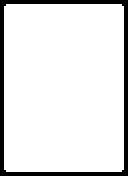

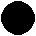

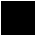

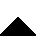

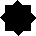

In [1]:
from PIL import Image, ImageOps
from IPython.display import display

star = 'shapes/star.png'
circle = 'shapes/circle.png'
square = 'shapes/square.png'
triangle = 'shapes/triangle.png'
frame ='shapes/frame.png'


star = Image.open(star)
circle = Image.open(circle)
square = Image.open(square)
triangle = Image.open(triangle)
frame = Image.open(frame)

display(frame)
display(circle)
display(square)
display(triangle)
display(star)



Now we need to change colors of the images.

First lets get the RGB color codes for the colors we want to use.
https://html-color.codes/

In [2]:
red = (255,36,0)
green = (11,218,81)
blue = (25,25,112)
yellow = (254,219,0)

1# First we split the image into parts. The black pixels and transparent pixels with split(), a method available for the image class from the PIL library.

2# Then we change the color with ImageOps.colorize. Here we change the black pixels to blue and white pixels to blue. (We dont have any white pixels in our images but the method requires that we set a color)

3# Lastly we add the transparent layer back in place.



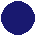

In [3]:
black, transparent = circle.split()

circle_blue = ImageOps.colorize(black, blue, blue)
circle_blue.putalpha(transparent)


display(circle_blue)

Next i will create a function that colors shapes. For the function i will put the shapes and colors into a list.

In [4]:
shapes = [circle,square,triangle,star]
colors = [blue,yellow,red,green]
numbers = [1,2,3,4]

In [5]:
def color(list_shapes,list_colors):
    for shape in list_shapes:
        for color in list_colors:
            black,transparent = shape.split()
            colored_shape = shape
            colored_shape = ImageOps.colorize(black,color,color)
            colored_shape.putalpha(transparent)
            display(colored_shape)
    
    

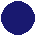

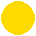

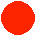

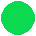

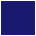

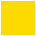

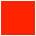

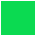

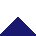

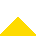

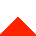

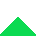

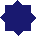

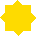

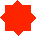

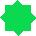

In [6]:
color(shapes,colors)

Then we will try to paste an image into the frame.
We will have to copy the frame, because paste will replace the picture but return NONE.
        

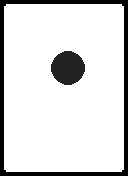

In [7]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(50,50))
display(c_frame)

The circle is now black. 

In [8]:
print("Frame mode:", frame.mode)
print("Circle before color transformation:", shapes[0].mode)
print("Circle after color transformation:", circle_blue.mode)



Frame mode: LA
Circle before color transformation: LA
Circle after color transformation: RGBA


The issue might be that the modes of the two images are different. We need to transform the frame into RGBA mode.
Converting image modes is easy with the convert method.

In [9]:
frame = frame.convert('RGBA')
print("Frame mode:", frame.mode)

Frame mode: RGBA


Lets try again.

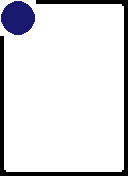

In [10]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(0,0))
display(c_frame)

As we can see the transparent background is gone. To get it back we can use the picture as a mask.

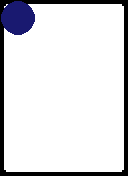

In [11]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(0,0),mask = circle_blue)
display(c_frame)

Now i want to make sure that the image is in the middle of the frame. PS. all shapes should be 36x36 pixels.

As we can see the image is pasted at the top left. The first cordinate is the horizontal axis, the second is the vertical. The scale is in pixels.

In [12]:
f_width,f_height = frame.size
c_width,c_height = circle_blue.size
print(f"Frame widht = {f_width}")
print(f"Frame height = {f_height}")
print(f"circle widht = {c_width}")
print(f"circle widht = {c_height}")

Frame widht = 128
Frame height = 176
circle widht = 36
circle widht = 36


If we divide the widht and height we get the position of the middle of the frame.


In [13]:
p_w = 128 / 2
p_h = 176 / 2
print(p_w)
print(p_h)

64.0
88.0


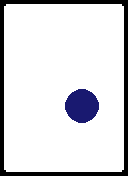

In [14]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(64,88),mask = circle_blue)
display(c_frame)

This is still not in the middle even though in a sense the image is placed in the middle. 
The top right corner of the image is located in the middle of the frame.

To correct for this, so that the middle of the picture will be in the center we need to subtract halv of the circle size. Thereby overshooting the right corner of the circle by 18 pixels from the center, both up and left.

In [15]:
p_w = 64 - 36 / 2
p_h = 88 - 36 / 2
print(p_w)
print(p_h)

46.0
70.0


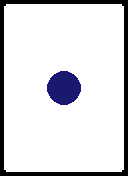

In [16]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(46,70),mask = circle_blue)
display(c_frame)

There we have it!. Now we need to determine the locations of for all 4 variations of the number * shape.

For two circles. 
Left_circle: 
L_horizontal_c = how far away i want the circle to be from the frame = 25
L_vertical_c = middle = 70 (for formula refer back to last calculation)

right_circle:
R_horizontal_c = width - circle_width - L_horizontal_c = 128 - 36 - 25 = 67
R_horiontal_c = middle = 70

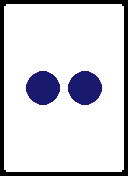

In [17]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(25,70),mask = circle_blue)
c_frame.paste(circle_blue,(67,70),mask = circle_blue)
display(c_frame)

I wont document more math during the next steps. It will be easier to test out manually different positions and calculate the specifics if neccessery.

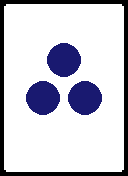

In [18]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(25,80),mask = circle_blue)
c_frame.paste(circle_blue,(67,80),mask = circle_blue)
c_frame.paste(circle_blue,(46,42),mask = circle_blue)

display(c_frame)

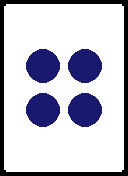

In [19]:
c_frame = frame.copy()
c_frame.paste(circle_blue,(25,92),mask = circle_blue)
c_frame.paste(circle_blue,(67,92),mask = circle_blue)
c_frame.paste(circle_blue,(25,48),mask = circle_blue)
c_frame.paste(circle_blue,(67,48),mask = circle_blue)

display(c_frame)

I will now store the positions in a dictionary:

In [20]:
positions = {
    
    1:[(46,70)],
    
    2:[(25,70),(67,70)],
    
    3:[(25,80),(67,80),(46,42)],
    
    4:[(25,92),(67,92),(25,48),(67,48)]
}

Now i want to create a function that loops through all possible combination and displays them.
I take the all the lists and the positions and loop through the creation process steps using the information from the lists with a tripple loop.


In [21]:
def create_cards(numbers,shapes,colors,positions):
    for shape in shapes:
        for color in colors:
            for number in numbers:
                black, transparent = shape.split()
                changeling = ImageOps.colorize(black, color, color)
                changeling.putalpha(transparent)
                if number == 1:
                    card = frame.copy()
                    card.paste(changeling,positions[1][0],mask = changeling)
                    display(card)
                elif number == 2:
                    card = frame.copy()
                    card.paste(changeling,positions[2][0],mask = changeling)
                    card.paste(changeling,positions[2][1],mask = changeling)
                    display(card)
                elif number == 3:
                    card = frame.copy()
                    card.paste(changeling,positions[3][0],mask = changeling)
                    card.paste(changeling,positions[3][1],mask = changeling)
                    card.paste(changeling,positions[3][2],mask = changeling)
                    display(card)
                elif number == 4:
                    card = frame.copy()
                    card.paste(changeling,positions[4][0],mask = changeling)
                    card.paste(changeling,positions[4][1],mask = changeling)
                    card.paste(changeling,positions[4][2],mask = changeling)
                    card.paste(changeling,positions[4][3],mask = changeling)
                    display(card)
                

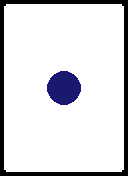

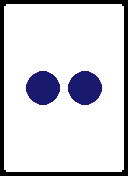

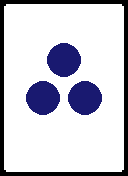

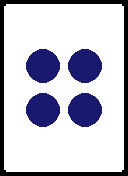

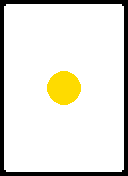

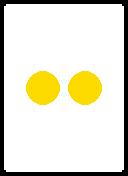

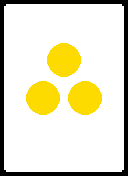

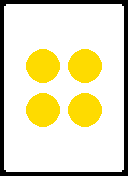

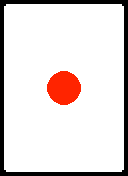

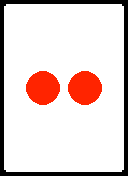

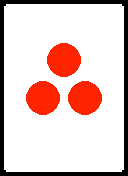

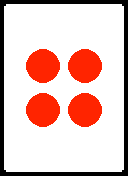

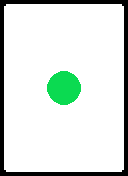

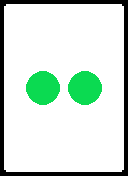

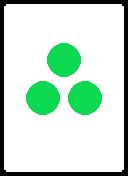

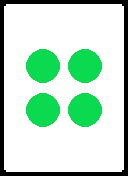

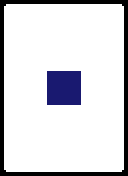

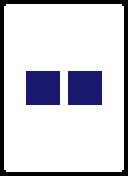

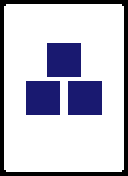

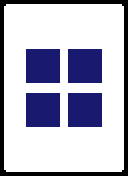

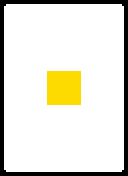

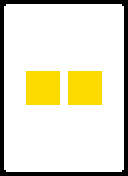

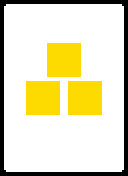

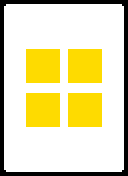

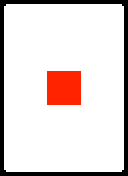

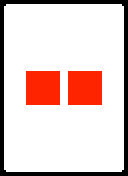

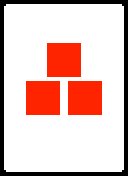

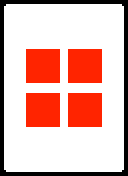

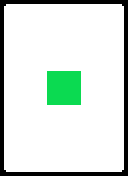

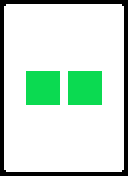

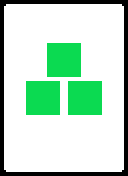

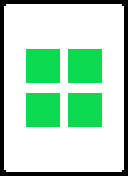

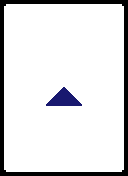

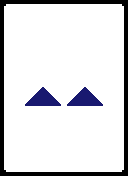

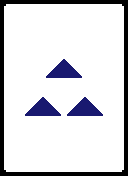

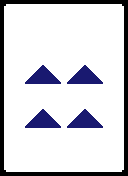

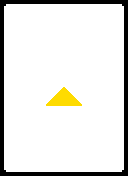

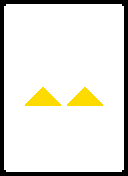

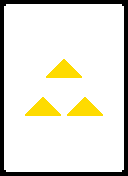

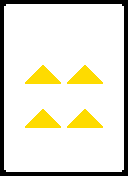

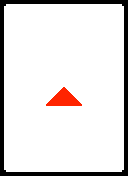

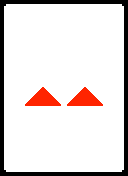

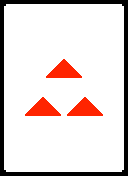

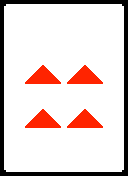

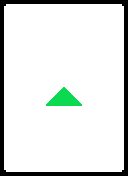

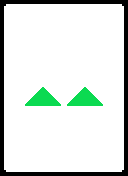

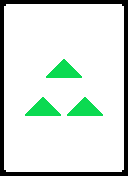

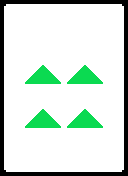

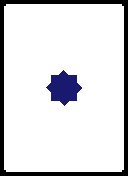

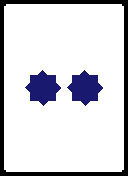

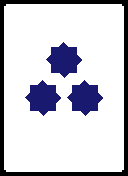

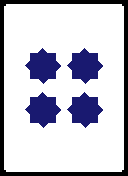

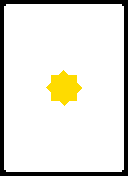

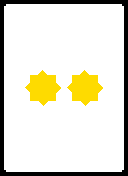

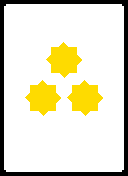

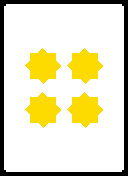

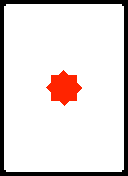

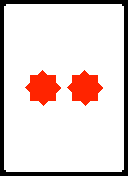

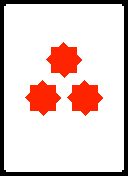

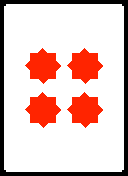

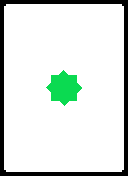

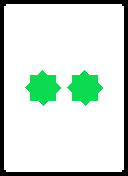

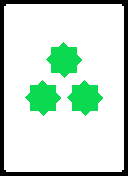

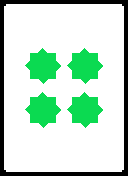

In [22]:
create_cards(numbers,shapes,colors,positions)

Yess! It works! 

Now, i want to save the images instead of displaying them. 

Additionally i want to have informative name for the files. This is a bit of a problem because the variables are no longer refering to the names, for example: the color red refers to the RGB color code. And the shapes refer to the image objects themself. Therefore we have to do this half manually. Because we know the sequance of the shapes, colors and numbers we will use this sequance as information. 

BEWARE, if the sequence is different then the names have to be changed accordingly. While this might not be the best way of doing this, it was the only way i could think of and works faster than nameing the files manually.


In [23]:
def create_cards(numbers,shapes,colors,positions):
    counter = 1
    for shape in shapes:
        for color in colors:
            for number in numbers:
                black, transparent = shape.split()
                changeling = ImageOps.colorize(black, color, color)
                changeling.putalpha(transparent)
                if number == 1:
                    card = frame.copy()
                    card.paste(changeling,positions[1][0],mask = changeling)
                    # Getting the shape
                    if str(shape) == str(shapes[0]):
                        s = "circle"
                    elif str(shape) == str(shapes[1]):
                        s = "square"
                    elif str(shape) == str(shapes[2]):
                        s = "triangle"
                    elif str(shape) == str(shapes[3]):
                        s = "star"
                    # Getting the color    
                    if str(color) == str(colors[0]):
                        c = "blue"
                    elif str(color) == str(colors[1]):
                        c = "yellow"
                    elif str(color) == str(colors[2]):
                        c = "red"
                    elif str(color) == str(colors[3]):
                        c = "green"
                    card.save(f"cards/{number}_{s}_{c}.png")    
                elif number == 2:
                    card = frame.copy()
                    card.paste(changeling,positions[2][0],mask = changeling)
                    card.paste(changeling,positions[2][1],mask = changeling)
                    # Getting the shape
                    if str(shape) == str(shapes[0]):
                        s = "circle"
                    elif str(shape) == str(shapes[1]):
                        s = "square"
                    elif str(shape) == str(shapes[2]):
                        s = "triangle"
                    elif str(shape) == str(shapes[3]):
                        s = "star"
                    # Getting the color    
                    if str(color) == str(colors[0]):
                        c = "blue"
                    elif str(color) == str(colors[1]):
                        c = "yellow"
                    elif str(color) == str(colors[2]):
                        c = "red"
                    elif str(color) == str(colors[3]):
                        c = "green"
                    card.save(f"cards/{number}_{s}_{c}.png")    
                elif number == 3:
                    card = frame.copy()
                    card.paste(changeling,positions[3][0],mask = changeling)
                    card.paste(changeling,positions[3][1],mask = changeling)
                    card.paste(changeling,positions[3][2],mask = changeling)
                   # Getting the shape
                    if str(shape) == str(shapes[0]):
                        s = "circle"
                    elif str(shape) == str(shapes[1]):
                        s = "square"
                    elif str(shape) == str(shapes[2]):
                        s = "triangle"
                    elif str(shape) == str(shapes[3]):
                        s = "star"
                    # Getting the color    
                    if str(color) == str(colors[0]):
                        c = "blue"
                    elif str(color) == str(colors[1]):
                        c = "yellow"
                    elif str(color) == str(colors[2]):
                        c = "red"
                    elif str(color) == str(colors[3]):
                        c = "green"
                    card.save(f"cards/{number}_{s}_{c}.png")    
                elif number == 4:
                    card = frame.copy()
                    card.paste(changeling,positions[4][0],mask = changeling)
                    card.paste(changeling,positions[4][1],mask = changeling)
                    card.paste(changeling,positions[4][2],mask = changeling)
                    card.paste(changeling,positions[4][3],mask = changeling)
                   # Getting the shape
                    if str(shape) == str(shapes[0]):
                        s = "circle"
                    elif str(shape) == str(shapes[1]):
                        s = "square"
                    elif str(shape) == str(shapes[2]):
                        s = "triangle"
                    elif str(shape) == str(shapes[3]):
                        s = "star"
                    # Getting the color    
                    if str(color) == str(colors[0]):
                        c = "blue"
                    elif str(color) == str(colors[1]):
                        c = "yellow"
                    elif str(color) == str(colors[2]):
                        c = "red"
                    elif str(color) == str(colors[3]):
                        c = "green"
                    card.save(f"cards/{number}_{s}_{c}.png")    

In [24]:
create_cards(numbers,shapes,colors,positions)